In [9]:
%matplotlib inline
from simulation import *
from math import pi

wavelength = 13.0
NA = 0.9
pitch = 16
grid_info_1d = grid_info_1d_s.create_grid_info_bloch_mode([-1], wavelength, 0.0, NA, [[-pitch/2], [pitch/2]], 1e-6)
print(grid_info_1d)
grid_info_2d = grid_info_2d_s.create_grid_info_bloch_mode([-1, -1], wavelength, 0.0, NA, [[-pitch/2, -pitch/2], [pitch/2, pitch/2]], 1e-6)
print(grid_info_2d)

freq_step, = grid_info_1d.fourier.step

* grid info                  
-------------------------------
tilesize      :  [3]         
spatial start :  [-8]        
spatial step  :  [5.33333]   
fourier start :  [0]         
fourier step  :  [0.902778]  

* grid info                           
----------------------------------------
tilesize      :  [3,3]                
spatial start :  [-8,-8]              
spatial step  :  [5.33333,5.33333]    
fourier start :  [0,0]                
fourier step  :  [0.902778,0.902778]  



create grid info size too small in dim-0. reset from -1 to 3
create grid info size too small in dim-0. reset from -1 to 3
create grid info size too small in dim-1. reset from -1 to 3


In [14]:
print(f"simulation system's fourier step is {freq_step}")
sp = source_point_s()
grid_index = [1, 0]
sp.sigmaxy = [n  * freq_step for n in grid_index] 

print(f"source point on grid {grid_index}")

# Wafer P.O.V
print(f"    sigma x-y is {sp.sigmaxy}") 
# Mask  P.O.V
M = 1
print(f"    k-vector  is {sp.k_vector(wavelength, NA / M)}")

simulation system's fourier step is 0.9027777910232544
source point on grid [1, 0]
    sigma x-y is [0.902778,0]
    k-vector  is [0.392699,0]


In [16]:
mask_pov = grid_info_1d_s.wafer_pov_k_space_boundary(NA, NA, [0, 0])
# aligin with hyper-lith
mask_pov = [[element * 2*pi * NA/ wavelength for element in inner_list] for inner_list in mask_pov]

wafer_pov = grid_info_1d_s.mask_pov_k_space_boundary(NA)

print(mask_pov)
print(wafer_pov)

[[0.0, 0.0, 0.4833219697527084], [0.0, 0.0, 0.2174948760177549]]
[[0,0,1.11111],[0,0,1]]


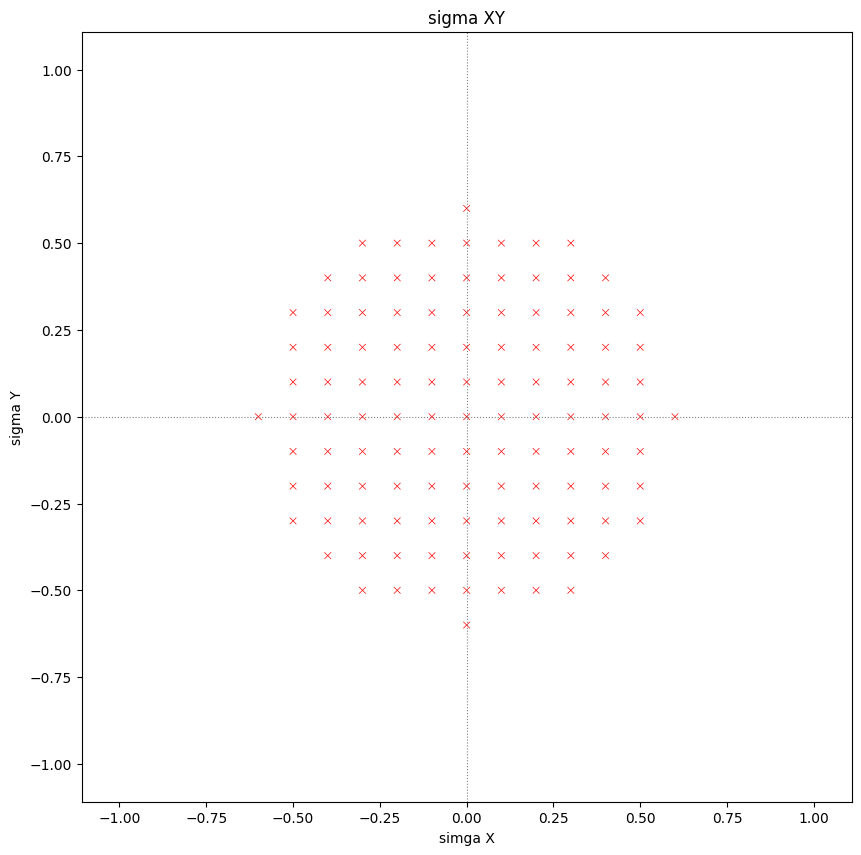

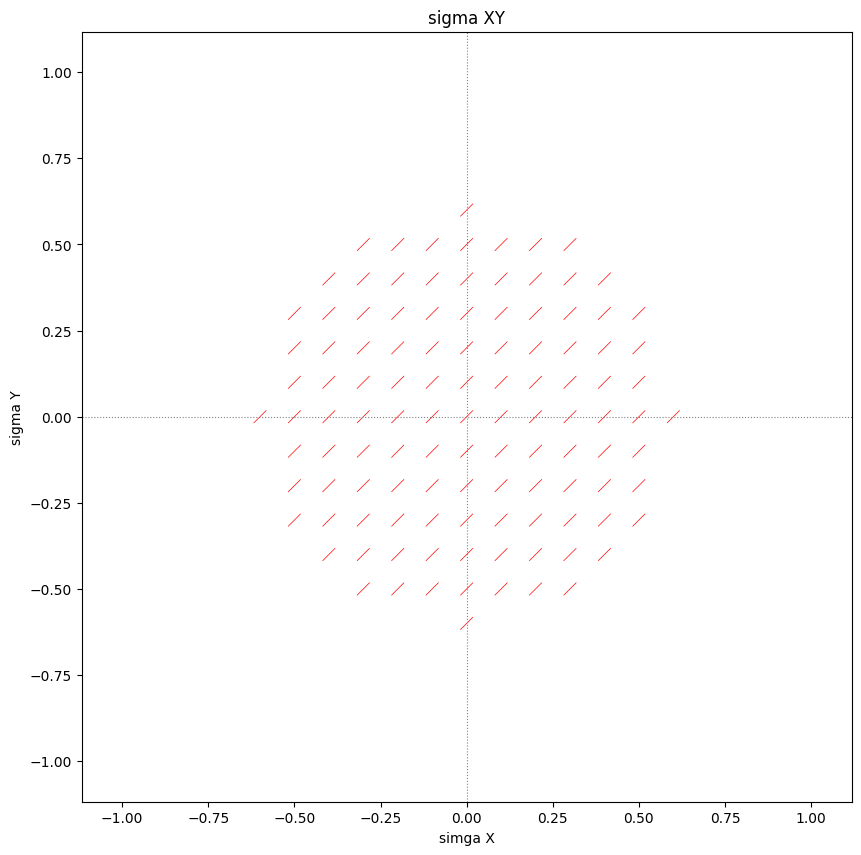

In [17]:

source_sampling_size = 21
assert(source_sampling_size%2 == 1)
ts = traditional_source_s()
ts.sigma = 0.6
shift_pixel = 0
ts.center_x = shift_pixel/ source_sampling_size
ts.center_y = shift_pixel/ source_sampling_size

# unpolarized
xy = source_grid_s.create_traditional_source(21, ts, 0.25*pi)
xy.plot()

# totally polarized
for sp in xy.source_points:
    sp.DOP = 1
xy.plot()


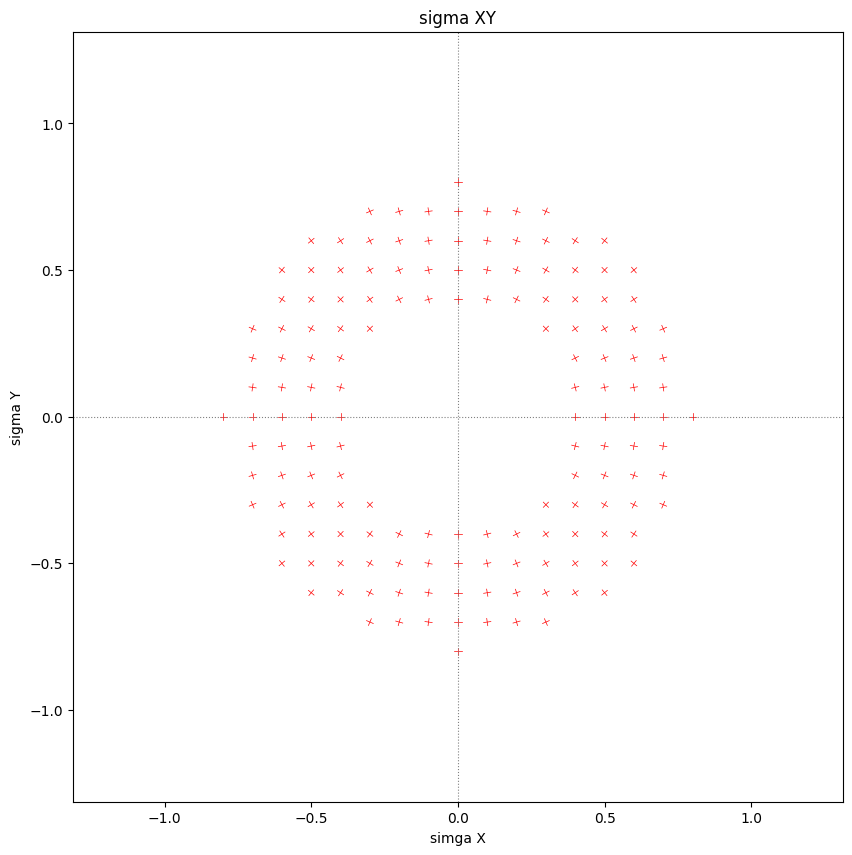

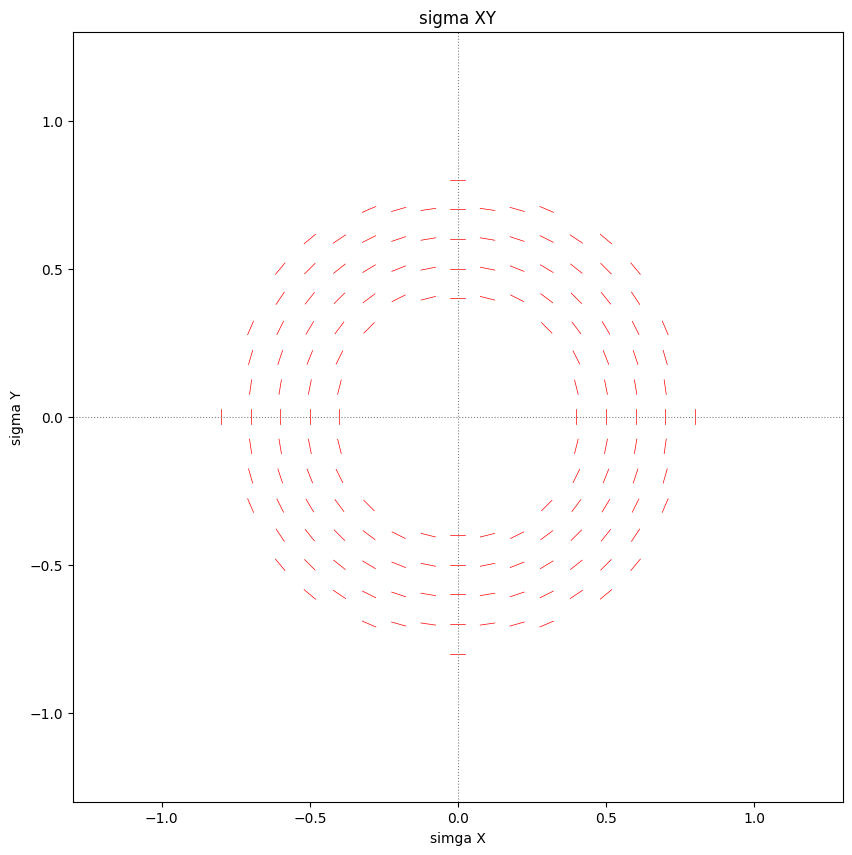

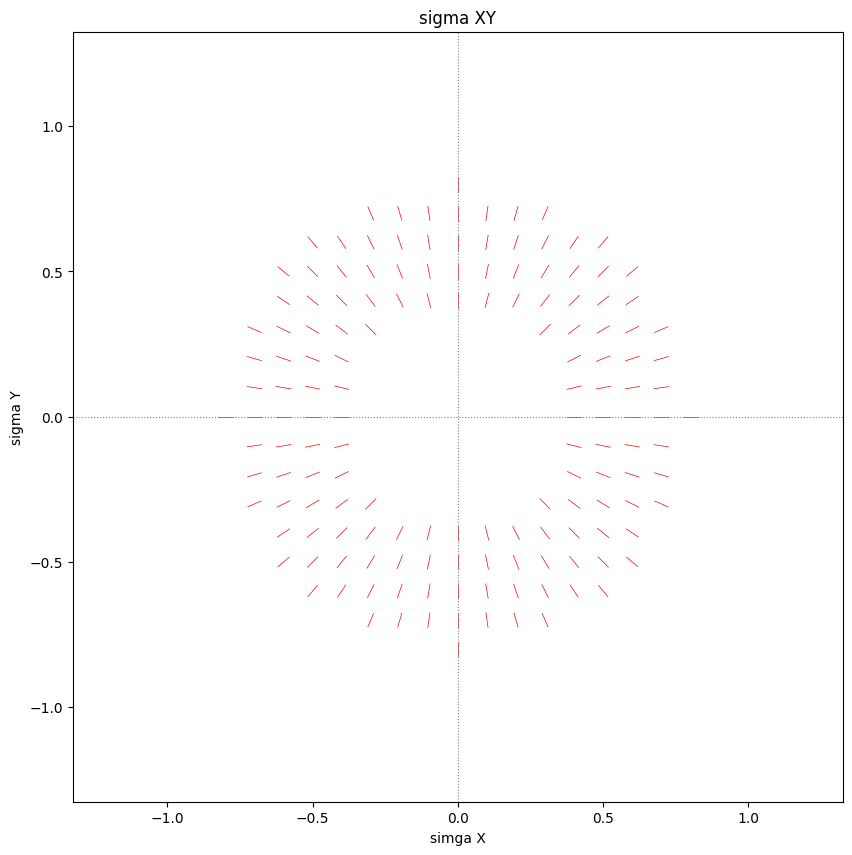

In [18]:
annular = annular_source_s()
annular.sigma_out = 0.8
annular.sigma_in = 0.4
annular.sigma_shift_x = annular.sigma_inner_shift_x = shift_pixel/ source_sampling_size
annular.sigma_shift_y = annular.sigma_inner_shift_x = shift_pixel/ source_sampling_size

# Y 方向作为 TE 偏振默认方向
sp_basis = source_grid_s.create_annular_source(21, annular, 0.5 * pi, 0, 1)
sp_basis.plot()

# totally  TE(s) polarized
for sp in sp_basis.source_points:
    sp.DOP = 1
sp_basis.plot()

# totally TM(p) polarized
for sp in sp_basis.source_points:
    sp.e_field_direction -= 0.5 * pi
sp_basis.plot()


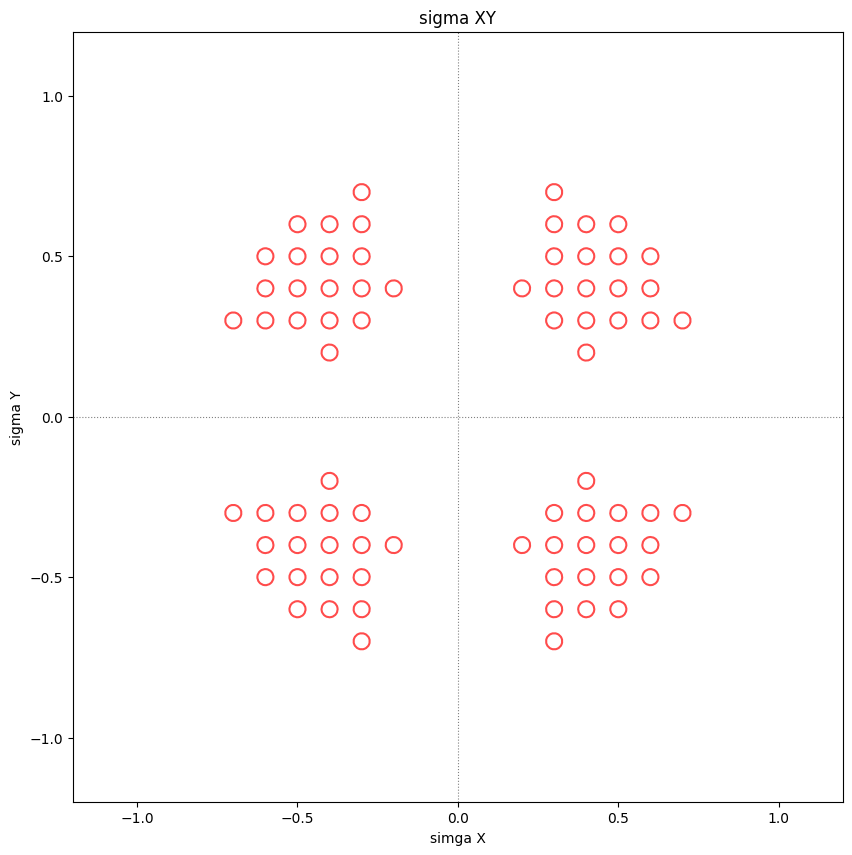

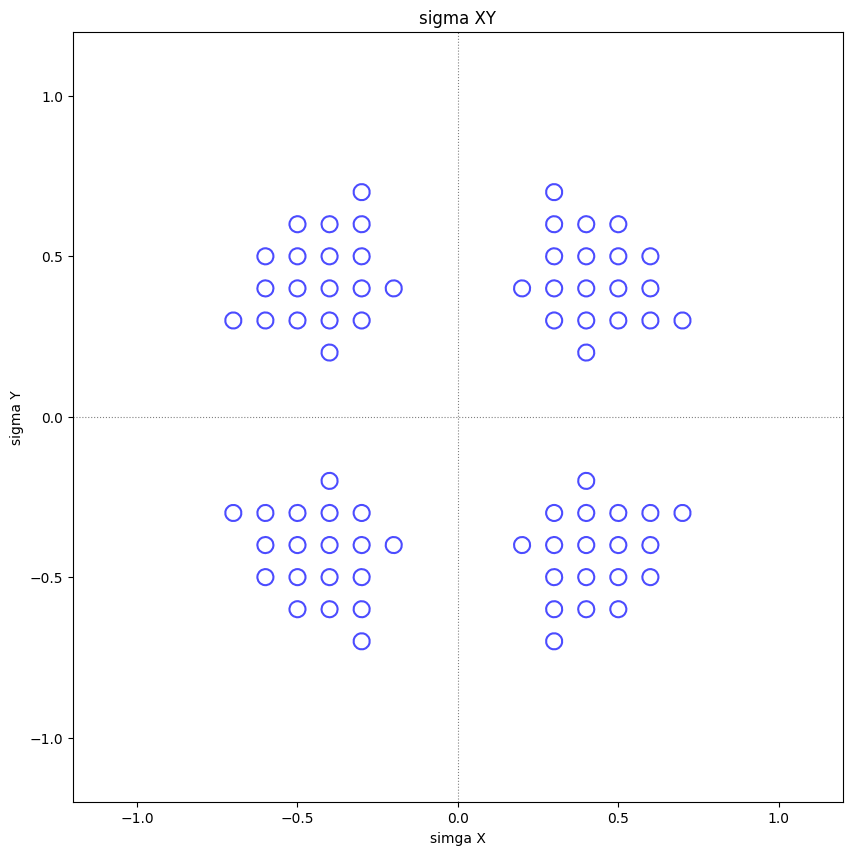

In [19]:
quadratic = quadratic_fan_source_s()
quadratic.annular = annular
quadratic.rotate_rad = 0.25 *pi
quadratic.span_rad = 0.25 * pi

# unclockwise circle
circle = source_grid_s.create_quadratic_fan_source(21, quadratic, 0.5 * pi, 1, 1)
# totally-polarized
for sp in circle.source_points:
    sp.intensity *= 2
    sp.DOP = 1
circle.plot()

# clockwise circle
for sp in circle.source_points:
    sp.ellipticity *= -1
circle.plot()

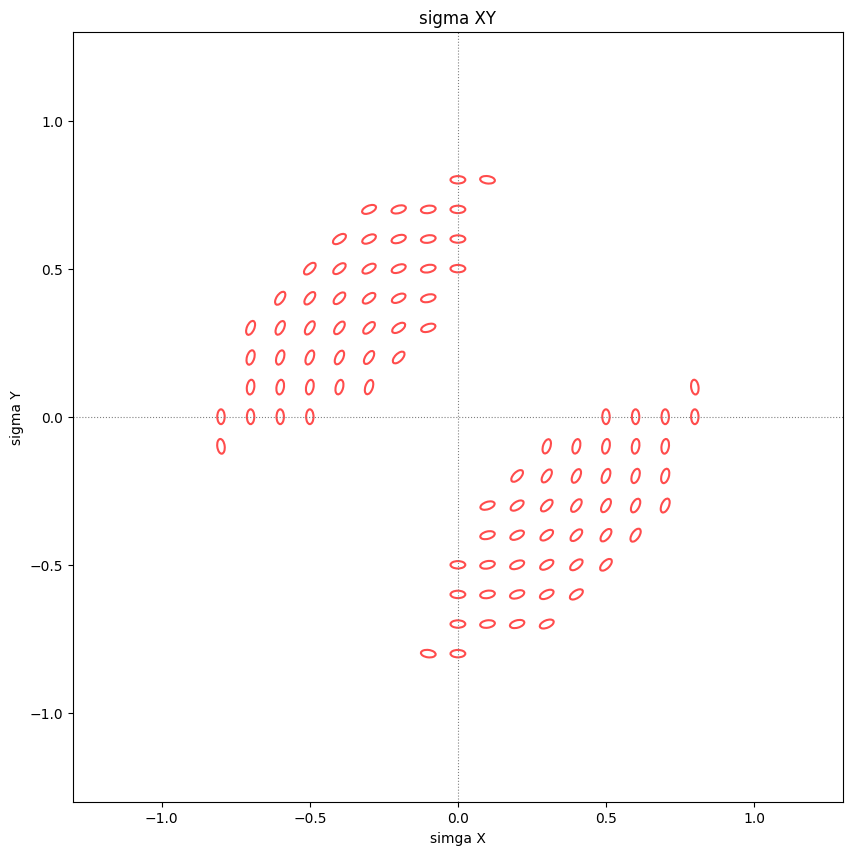

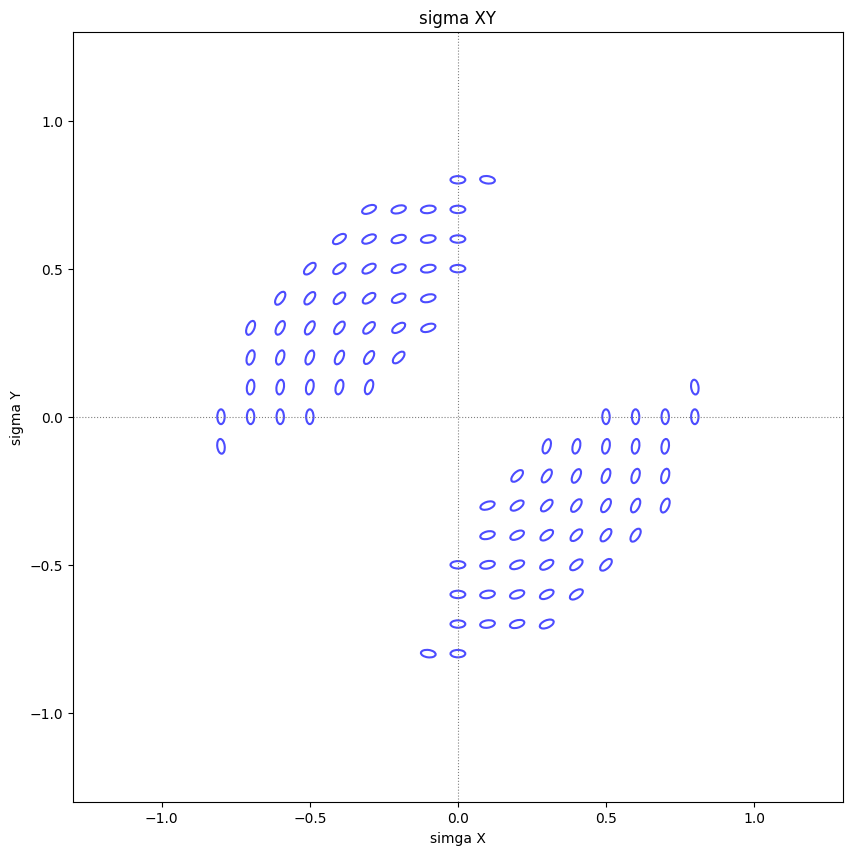

In [20]:
dipole_leaf = dipole_leaf_source_s()
# distance
dipole_leaf.sigma_D = 0.5
# thickness
dipole_leaf.sigma_d = 0.5
# rotate
dipole_leaf.rotate_rad = 0.75 * pi
dipole_leaf.sigma_shift_x = shift_pixel/ source_sampling_size
dipole_leaf.sigma_shift_y = shift_pixel/ source_sampling_size

# unclockwise circle
ellipsis = source_grid_s.create_dipole_leaf_source(21, dipole_leaf, 0.5 * pi, 0.5, 1)
# totally-polarized
for sp in ellipsis.source_points:
    sp.intensity *= 2
    sp.DOP = 1
ellipsis.plot()

# clockwise circle
for sp in ellipsis.source_points:
    sp.ellipticity *= -1
ellipsis.plot()